# PyTorch Introduction

This is an introduction of PyTorch. It’s a Python-based scientific computing package targeted at two sets of audiences:

- A replacement for NumPy to use the power of GPUs;

- a deep learning research platform that provides maximum flexibility and speed.
    - [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) is the central class of PyTorch.

    - Central to all neural networks in PyTorch is the [`autograd`](https://pytorch.org/docs/stable/autograd.html)
    package. It provides automatic differentiation for all
    operations on Tensors. If we set the attribute `.requires_grad` of `torch.Tensor` as `True`, it starts to
    track all operations on it. When finishing computation, we can call `.backward()` and have all the gradients
    computed automatically. The gradient for this tensor will be accumulated into `.grad` attribute.


## Goals of this tutorial

- Understanding PyTorch's Tensor library and neural networks at a high level;

- Training a small network with PyTorch;


## Preparation

- Install [PyTorch](https://pytorch.org/) and [torchvision](https://github.com/pytorch/vision) (CPU version); (**If you want to install a cuda version, remember to change the type of the following cell into markdown**)




In [1]:
# Linux and probably Windows, remove the "> /dev/null" if you want to see the output
#!pip install torch==1.4.0+cpu torchvision==0.5.0+cpu -f https://download.pytorch.org/whl/torch_stable.html > /dev/null
# Mac
!pip install torch==1.4.0 torchvision==0.5.0 > /dev/null
!pip install -U numpy

Requirement already up-to-date: numpy in /Users/k.karmakar/opt/anaconda3/lib/python3.7/site-packages (1.18.5)


- <div class="alert alert-block alert-info"><b>(Optional)</b> You can also install a
<a href="https://developer.nvidia.com/cuda-downloads">Cuda</a>
version if an Nvidia GPU and Cuda setup is installed on your machine, e.g.</div>

```python
# CUDA 10.0
pip install torch==1.4.0+cu100 torchvision==0.5.0+cu100 -f https://download.pytorch.org/whl/torch_stable.html
```
- <div class="alert alert-block alert-danger">Make sure you've installed the <b>same version of PyTorch and
 torchvision</b>. If you install your own version, there might be some issues.</div>

In [2]:
import torch
import torchvision
print(f"Torch version: {torch.__version__}\nTorchvision version: {torchvision.__version__}\n")
if not torch.__version__.startswith("1.4.0"):
    print("you are using an another version of PyTorch. We expect PyTorch 1.4.0. You can continue with your version but it"
          " might cause some issues")
if not torchvision.__version__.startswith("0.5.0"):
    print("you are using an another version of torchvision. We expect torchvision 0.5.0. You can continue with your version but it"
          " might cause some issues")

Torch version: 1.4.0
Torchvision version: 0.5.0



## 1. Getting Started

In this session you will learn the basic element Tensor and some simple oprations of PyTorch.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

%load_ext autoreload
%autoreload 2
%matplotlib inline

### 1.1 Tensors

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate
computing.

In [4]:
# Construct a (2,3) NumPy array and a (2,3) tensor directly from data
# [[1 2 3]
#  [4 5 6]]
a_np = np.array([[1,2,3],[5,6,7]]) #NumPy array
a_ts = torch.tensor([[1,2,3],[4,5,6]]) # Tensor
print("a_np:\n {},\n Shape: {}".format(type(a_np), a_np.shape))
print(a_np)
print("a_ts:\n {},\n Shape: {}".format(type(a_ts), a_ts.shape)  )
print(a_ts)

a_np:
 <class 'numpy.ndarray'>,
 Shape: (2, 3)
[[1 2 3]
 [5 6 7]]
a_ts:
 <class 'torch.Tensor'>,
 Shape: torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])


### 1.2 Conversion btw. NumPy ndarray and Tensor

The conversion between NumPy ndarray and PyTorh tensor is quite easy.


In [5]:
# Conversion
m_np = np.array([1, 2, 3])
n_ts = torch.from_numpy(m_np) #Convert a numpy array to a Tensor

v_np = n_ts.numpy() #Tensor to numpy
v_np[1] = -1 #Numpy and Tensor share the same memory
assert(m_np[1] == v_np[1]) #Change Numpy will also change the Tensor

<div class="alert alert-block alert-info"><b>Hint:</b> During the conversion, both ndarray and Tensor share the same memory storage. Change value from either side will
affect the other.</div>

### 1.3 Operations

#### 1.3.1 Indexing

We can use the NumPy indexing in Tensors:

In [6]:
# Let us take the first two columns from the original array and save it in a new one
b = a_ts[:2, :2] #Use numpy type indexing
#b.shape
b[:, 0] = 0 #For assignment
print(b)

tensor([[0, 2],
        [0, 5]])


In [7]:
# Select elements which satisfy a condition
# Using numpy array makes such a selection trivial
mask = a_ts > 1
new_array = a_ts[mask]
print(new_array)

tensor([2, 3, 5, 6])


In [8]:
# Do the same thing in a single step
c = a_ts[a_ts>1]
print(c == new_array) #Why assert doesn't work here
##assert np.all(new_array == c) #  np.all() to indicate that all the values need to match

tensor([True, True, True, True])


#### 1.3.2 Mathematical operations

In [9]:
# Mathematical operations
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])

# Elementwise Addition
# [[ 6.0  8.0]
#  [10.0 12.0]]
#Addition: syntax 1
print("x + y: {}".format(x + y))
#Addition: syntax 2
print("x + y: {}".format(torch.add(x, y)))
#Addition: syntax 3
result_add = torch.empty(2, 2)
torch.add(x, y, out=result_add)
print("x + y: {}".format(result_add))

# Elementwise Subtraction
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
# Subtraction: syntax 1
print("x - y: {}".format(x - y))
# Subtraction: syntax 2
print("x - y: {}".format(torch.sub(x, y)))
# Subtraction: syntax 3
result_sub = torch.empty(2, 2)
torch.sub(x, y, out=result_sub)
print("x - y: {}".format(result_sub))

# Elementwise Multiplication
# [[ 5.0 12.0]
#  [21.0 32.0]]
# Multiplication: syntax 1
print("x * y: {}".format(x * y))
# Multiplication: syntax 2
print("x * y: {}".format(torch.mul(x, y)))
# Multiplication: syntax 3
result_mul = torch.empty(2, 2)
torch.mul(x, y, out=result_mul)
print("x * y: {}".format(result_mul))




x + y: tensor([[ 6,  8],
        [10, 12]])
x + y: tensor([[ 6,  8],
        [10, 12]])
x + y: tensor([[ 6.,  8.],
        [10., 12.]])
x - y: tensor([[-4, -4],
        [-4, -4]])
x - y: tensor([[-4, -4],
        [-4, -4]])
x - y: tensor([[-4., -4.],
        [-4., -4.]])
x * y: tensor([[ 5, 12],
        [21, 32]])
x * y: tensor([[ 5, 12],
        [21, 32]])
x * y: tensor([[ 5., 12.],
        [21., 32.]])


When dividing two ints in NumPy, the result is always a **float**, e.g.

In [10]:
x_np = np.array([[1,2],[3,4]])
y_np = np.array([[5,6],[7,8]])
print(x_np / y_np)

[[0.2        0.33333333]
 [0.42857143 0.5       ]]




**However, in PyTorch 1.4.0 `torch.div` calculates floor division if both operands have integer types**;
  If you want **true division** for integers, pleases convert the integers into floats first or specify the output as
  `torch.div(a, b, out=c)`.
<div class="alert alert-block alert-danger">In PyTorch 1.5.0 you can use <b>true_divide</b> or <b>floor_divide</b>
 to calculate true division or floor division. And in future release div will perform true division as in Python 3. </div>


In [11]:
# Elementwise Division
# Floor Division: syntax 1
print("x // y: {}".format(x / y))
# Floor Division: syntax 2
print("x // y: {}".format(torch.div(x, y)))
# True Division: syntax 1
result_true_div = torch.empty(2, 2)
torch.div(x, y, out=result_true_div)
print("x / y: {}".format(result_true_div))

x // y: tensor([[0, 0],
        [0, 0]])
x // y: tensor([[0, 0],
        [0, 0]])
x / y: tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


### 1.4 Devices

When training a neural network, make sure that all the tensors are on the same device. Tensors can be moved onto any device using `.to` method.

In [12]:
# We will use ``torch.device`` objects to move tensors in and out of GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

print(f"Original device: {x.device}") # "cpu", integer

tensor = x.to(device)
print(f"Current device: {tensor.device}") #"cpu" or "cuda", double

cpu
Original device: cpu
Current device: cpu


So `x` has been moved onto cuda for those who have a GPU; otherwise it's still on the CPU.

<div class="alert alert-block alert-info"><b>Tip:</b> Include the <b>.to(device)</b> calls for every project such that
you can easily port it to a GPU version.</div>

## 2. Training a classifier with PyTorch

In this session, you'll have an overview about how we could use PyTorch to load data, define neural networks, compute
loss and make updates to the weights of the network.


We will do the following steps in order:

a) Dataloading in Pytorch compared to our previous datasets

b) Define a two-layer network

c) Define a loss function and optimizer

d) Train the network

e) Test the network

### 2.1 Datasets and Loading

The general procedure of dataloading is:

a) Extract: Get the data from the source

b) Transform: Put our data into suitable form (e.g. tensor form)

c) Load: Put our data into an object to make it easily accessible

#### 2.1.1 House price

We'll use our dataloader and the dataloader of PyTorch to load the house price dataset separately.

First, let's initialize our csv dataset from exercise 3:

In [13]:
from exercise_code.data.csv_dataset import CSVDataset, get_exercise5_transform
from exercise_code.data.dataloader import DataLoader as our_DataLoader

# dataloading and preprocessing steps as in ex04 2_logistic_regression.ipynb
target_column = 'SalePrice'
i2dl_exercises_path = os.path.dirname(os.path.abspath(os.getcwd()))
root_path = os.path.join(i2dl_exercises_path, "datasets", 'housing')
housing_file_path = os.path.join(root_path, "housing_train.csv")
download_url = 'https://cdn3.vision.in.tum.de/~dl4cv/housing_train.zip'

# Set up the transform to get two prepared columns
select_two_columns_transform = get_exercise5_transform()

# Set up the dataset
our_csv_dataset = CSVDataset(target_column=target_column, root=root_path, download_url=download_url, mode="train",
                             transform=select_two_columns_transform)

Now we can set up our dataloader similar to Exercise 5

In [14]:
# Set up our old dataloader
batch_size = 4
our_dataloader = our_DataLoader(our_csv_dataset, batch_size=batch_size)

for i, item in enumerate(our_dataloader):
    print('Starting item {}'.format(i))
    print('item contains')
    for key in item:
        print(key)
        print(type(item[key]))
        print(item[key].shape)
    
    if i+1 >= 1:
        break

Starting item 0
item contains
features
<class 'numpy.ndarray'>
(4, 2)
target
<class 'numpy.ndarray'>
(4, 1)


In pyTorch we can directly use a [`Dataloader` class](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)
and simply initalize it. And it also provides more parameters than ours, such as easy multiprocessing using `num_workers`. You can refer to the link
to learn those additional supports.

In [15]:
from torch.utils.data import DataLoader

pytorch_dataloader = DataLoader(our_csv_dataset, batch_size=batch_size)

# We can use the exact same way to iterate over samples
for i, item in enumerate(pytorch_dataloader):
    print('Starting item {}'.format(i))
    print('item contains')
    for key in item:
        print(key)
        print(type(item[key]))
        print(item[key].shape)
    
    if i+1 >= 1:
        break

Starting item 0
item contains
features
<class 'torch.Tensor'>
torch.Size([4, 2])
target
<class 'torch.Tensor'>
torch.Size([4, 1])


<div class="alert alert-block alert-info">As you can see, both dataloaders load the data with batch_size 4 and the data contains 2 features and 1 target. The only <b>difference</b> here is that the Dataloader of PyTorch will automatically transform the dataset into tensor format.</div>

#### 2.1.2 Torchvision

Specifically for vision, there's a package called `torchvision`, that has data loaders for common datasets such
as Imagenet, FashionMNIST, MNIST, etc. and data transformers for images:
`torchvision.datasets` and `torch.utils.data.DataLoader`.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use FashionMNIST dataset. It has 10 classes: 'T-shirt/top', 'Trouser', 'Pullover',
'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'. The images in FashionMNIST
are of size $1 \times 28 \times 28 $, i.e. 1-channel color images of $ 28 \times 28 $ pixels in size.

In [16]:
#Define a transform to convert images to tensor
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])  # mean and std have to be sequences (e.g. tuples),
                                                                      # therefore we should add a comma after the values

fashion_mnist_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=True,
                                                          download=True, transform=transform)
fashion_mnist_test_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=False,
                                                          download=True, transform=transform)

fashion_mnist_dataloader = DataLoader(fashion_mnist_dataset, batch_size=8)
fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test_dataset, batch_size=8)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

- `transforms.Compose` creates a series of transformation to prepare the dataset.

- `transforms.ToTenser` convert `PIL image` or numpy.ndarray $(H \times W\times C)$ in the range [0,255] to a
`torch.FloatTensor` of shape $(C \times H \times W)$ in the range [0.0, 1.0].

- `transforms.Normalize` normalize a tensor image with mean and standard deviation.

- `datasets.FashionMNIST` to download the Fashion MNIST datasets and transform the data.
`train=True` if we want to get the training set; otherwise set `train=False` to get the
test set.

- `torch.utils.data.Dataloader` takes our training data or test data with parameter
`batch_size` and `shuffle`. `batch_size` defines how many samples per batch to load.
`shuffle=True` makes the data reshuffled at every epoch.

In [17]:
# We can use the exact same way to iterate over samples
for i, item in enumerate(fashion_mnist_dataloader):
    print('Starting item {}'.format(i))
    print('item contains')
    image, label = item
    print(f"Type of input: {type(image)}")
    print(f"Shape of the input: {image.shape}")
    print(f"label: {label}")

    if i+1 >= 1:
        break

Starting item 0
item contains
Type of input: <class 'torch.Tensor'>
Shape of the input: torch.Size([8, 1, 28, 28])
label: tensor([9, 0, 0, 3, 0, 2, 7, 2])


Since we loaded the data with `batch_size` 8, the shape of the input is (8, 1, 28, 28). So before we push it into the affine layer, we need to flatten it with `x = x.view(-1, x.size[0)` (It will be shown later in 2.2)


Let's show some of the training images.

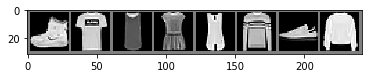

Ankle boot T-shirt/top T-shirt/top Dress T-shirt/top Pullover Sneaker Pullover


In [18]:
def imshow(img):
    img = img / 2 + 0.5 # unormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(fashion_mnist_dataloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

### 2.2 Define a Two-Layer Network

In exercise_06 we've defined the forward and backward pass for an affine layer and a Sigmoid layer
(`exercise_code/networks/layer.py`) and completed the implementation of the `ClassificationionNet` class
(`exercise_code/networks/classifiation_net.py`).

In [19]:
from exercise_code.networks.classification_net import ClassificationNet
hidden_size = 100
std = 1.0
model_ex06 = ClassificationNet(input_size=2, hidden_size=hidden_size, std=std)

Have a look at your lengthy implementation first ;). Now, we can use `torch.nn.Module` to define our network class, e.g.

In [20]:
import torch.nn as nn


class Net(nn.Module):
    def __init__(self, activation=nn.Sigmoid(),
                 input_size=1*28*28, hidden_size=100, classes=10):
        super(Net, self).__init__()
        self.input_size = input_size

        # Here we initialize our activation and set up our two linear layers
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, classes)

    def forward(self, x):
        x = x.view(-1, self.input_size) # flatten
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)

        return x

Similar to the `ClassificationNet` in exercise_06, here we defined a network with PyTorch.

 - PyTorch provides a `nn.Module` that builds neural networks

 - `super().__init__` creates a class that inherits attributes and behaviors from another
 class

 - `self.fc1` creates an affine layer with `input_size` inputs and `hidden_size` outputs.

 - `self.fc2` is similar to `self.fc1`.

 - `Forward` pass:

    - first flatten the `x` with `x = x.view(-1, self.input_size)`

    - 'Sandwich layer' by applying `fc1`, `activation`, `fc2` sequentially.
    
<div class="alert alert-block alert-info">Thanks to <b>autograd</b> package, we just have to define the <b>forward</b> function. 
 And the <b>backward</b> function (where gradients are computed) is automatically defined. We can use any of the Tensor operations in the <b>forward</b>  function.</div>

<div class="alert alert-block alert-info"> We can use <b>print</b> to see all difined layers (but it won't show
the information of the forward pass).

And all the learnable parameters of a model are returned by <b>[model_name].parameters()</b>. We also have access to
the parameters of different layers by <b>[model_name].[layer_name].parameters()</b> </div>

In [21]:
#  create model
net = Net()
net = net.to(device) #always remember to move the network to the device

print(net)

for parameter in net.parameters():
    print(parameter.shape)

Net(
  (activation): Sigmoid()
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### 2.3 Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.

Recall that we've implemented SGD and MSE in exercise_04. Have a look at their implementations in
 `exercise_code/networks/optimizer.py` and `exercise_code/networks/loss.py`

In [22]:
from exercise_code.networks.optimizer import SGD
from exercise_code.networks.loss import MSE, L1

Now we can import the loss function and optimizer directly from `torch.nn` and `torch.optim` respectively, e.g.

In [23]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 2.4 Train the network

This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to
the network and optimize.

In [24]:
train_loss_history = [] # loss
train_acc_history = [] # accuracy
for epoch in range(2):

    # TRAINING
    running_loss = 0.0
    correct = 0.0
    total = 0
    for i, data in enumerate(fashion_mnist_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        X, y = data

        X = X.to(device)
        y = y.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        y_pred = net(X) # input x and predict based on x
        loss = criterion(y_pred, y) # calculate the loss
        loss.backward()  # backpropagation, compute gradients
        optimizer.step()  # apply gradients

        # loss and acc
        running_loss += loss.item()
        _, preds = torch.max(y_pred, 1) #convert output probabilities to predicted class
        correct += preds.eq(y).sum().item()
        total += y.size(0)

        # print statistics
        if i % 1000 == 999: # print every 1000 mini-batches
            running_loss /= 1000
            correct /= total
            print("[Epoch %d, Iteration %5d] loss: %.3f acc: %.2f %%" % (epoch+1, i+1, running_loss, 100*correct))
            train_loss_history.append(running_loss)
            train_acc_history.append(correct)
            running_loss = 0.0
            correct = 0.0
            total = 0

print('FINISH.')

[Epoch 1, Iteration  1000] loss: 1.548 acc: 55.85 %
[Epoch 1, Iteration  2000] loss: 0.907 acc: 72.52 %
[Epoch 1, Iteration  3000] loss: 0.738 acc: 74.94 %
[Epoch 1, Iteration  4000] loss: 0.651 acc: 77.06 %
[Epoch 1, Iteration  5000] loss: 0.603 acc: 79.09 %
[Epoch 1, Iteration  6000] loss: 0.570 acc: 79.77 %
[Epoch 1, Iteration  7000] loss: 0.549 acc: 80.54 %
[Epoch 2, Iteration  1000] loss: 0.516 acc: 81.83 %
[Epoch 2, Iteration  2000] loss: 0.504 acc: 82.30 %


KeyboardInterrupt: 

So the general training pass is as fowllows:

- `zero_grad()`: zero the gradient buffers of all parameters and backprops with random gradient

- `y_pred = net(X)`: make a forward pass through the network to getting log probabilities by passing the
images to the model.

- `loss = criterion(y_pred, y)`: calculate the loss

- `loss.backward()`: perform a backward pass through the network to calculate the gradients for model parameters.

-  `optimizer.step()`: take a step with the optimizer to update the model parameters.

We keep tracking the training loss and accuracy over time. The following plot shows averages values for train loss and
accuracy.

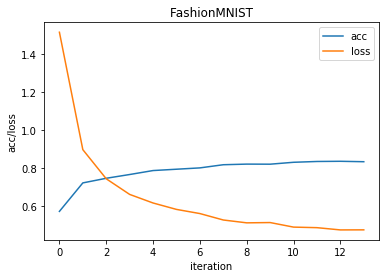

In [28]:
plt.plot(train_acc_history)
plt.plot(train_loss_history)
plt.title("FashionMNIST")
plt.xlabel('iteration')
plt.ylabel('acc/loss')
plt.legend(['acc', 'loss'])
plt.show()


### 2.5 Test the network on the test data

We have trained the network for 2 passes over the training dataset. Now we want to check
the model by predicting the class label that the neural network outputs, and checking it
against the ground-truth. If the prediction is correct, we add the sample to the list of
correct predictions.

And we'll visualize the data to display test images and their labels in the following format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

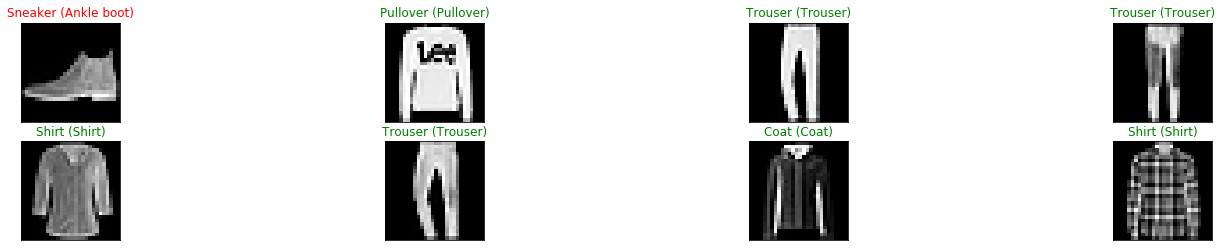

In [29]:
#obtain one batch of test images
dataiter = iter(fashion_mnist_test_dataloader)
images, labels = dataiter.__next__()
images, labels = images.to(device), labels.to(device)

# get sample outputs
outputs = net(images)
# convert output probabilites to predicted class
_, predicted = torch.max(outputs, 1)

# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25,4))
for idx in range(8):
    ax = fig.add_subplot(2, 8/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title(f"{classes[predicted[idx]]} ({classes[labels[idx]]})",
                color="green" if predicted[idx]==labels[idx] else "red")

We can also show what are the classes that performed well, and the classes that did not perform well:

In [30]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in fashion_mnist_test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %11s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top: 82 %
Accuracy of     Trouser: 94 %
Accuracy of    Pullover: 77 %
Accuracy of       Dress: 89 %
Accuracy of        Coat: 76 %
Accuracy of      Sandal: 87 %
Accuracy of       Shirt: 40 %
Accuracy of     Sneaker: 91 %
Accuracy of         Bag: 93 %
Accuracy of  Ankle boot: 93 %


## Reference

1. [PyTorch Tutorial](https://pytorch.org/tutorials/)

2. [Fashion MNIST dataset training using PyTorch](https://medium.com/@aaysbt/fashion-mnist-data-training-using-pytorch-7f6ad71e96f4)


